runtodo bwsmclr
rundir smc_lr_2_21
rundir smc_lr_2_21
rundir smc_lr_2_21
loading file : /home/tkc004/oasis/bw/smc/smc_lr_2_21//output//snapshot_500.hdf5
npart_file:  [ 326390 1000000   57000    4200    3610       1]
npart_total: [ 326390 1000000   57000    4200    3610       1]
flag_cooling 1
rundir smc_lr_2_21
loading file : /home/tkc004/oasis/bw/smc/smc_lr_2_21//output//snapshot_450.hdf5
npart_file:  [ 326693 1000000   57000    4200    3307       1]
npart_total: [ 326693 1000000   57000    4200    3307       1]
flag_cooling 1
partZ []


ValueError: array of sample points is empty

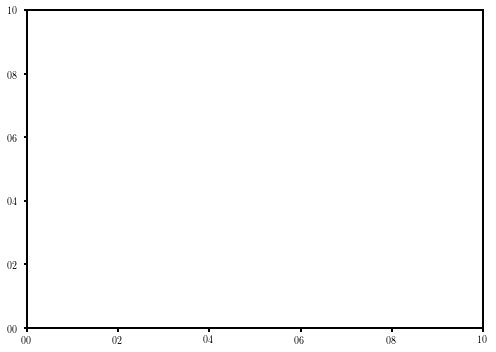

In [5]:
from stdmodandoption import *
import plot_setup as PS
import collections




def calTz(runtodo,wanted,startno,Nsnap,snapsep,fmeat):
    title='MW'
    titleneed=title
    needlog=0
    dclabelneed=1
    correctIa=0
    useM1=1
    the_prefix='snapshot'
    the_suffix='.hdf5'
    withinr=15.0
    nogrid=40
    maxlength=10.0
    med = -0.1 
    wholeboxgas=1
    diskgas=1
    Rfrac = 0.5
    nosum=0
    xaxis_snapno=0
    plotloc='/home/tkc004/samsonprogram/'
    nested_dict = lambda: collections.defaultdict(nested_dict)
    plotdict = nested_dict()
    if wanted=='Tztrack' or wanted=='rhoztrack' or wanted=='vzztrack' or wanted=='Tvztrack':
        rcParams['figure.figsize'] = 5, 4
        from matplotlib.patches import FancyArrowPatch 
        def arrow(x,y,ax,n,color):
            d = len(x)//(n+1)    
            ind = np.arange(d,len(x),d)
            for i in ind:
                ar = FancyArrowPatch ((x[i-1],y[i-1]),(x[i],y[i]), 
                      arrowstyle='->', mutation_scale=20,color=color)
            ax.add_patch(ar)
        rcParams['figure.figsize'] = 5, 4
        userad=0
        snaptrack = Nsnap
        Tcut_t=1.0 #K
        highTcut_t = 1e3
        vcut_t=30.0 #outflow velocity cut
        vhcut_t = 1e10 #upper outflow velocity cut
        withinr_t=20.0
        zup_t=30.0
        zdown_t=20.0
        zup=zup_t
        zdown=0.
        if wanted=='Tztrack':
                extent = [zdown,zup,3.5,6.5]
        if wanted=='rhoztrack':
                extent = [zdown,zup,-7,4]
        if wanted=='vzztrack':
                extent = [zdown,zup,1.0,2.8]
        if wanted=='Tvztrack':
                extent = [1,3.2,3.5,7]
        #try:
        info = SSF.outdirname(runtodo, Nsnap)
        runtitle=info['runtitle']
        ptitle=title
        ymin=extent[2]
        ymax = extent[3]
        if runtitle=='SMC':
            ptitle='Dwarf'
            if wanted=='Tztrack' or wanted=='Tvztrack':
                ymax = 5.5; ymin = 3.5
            if wanted=='vzztrack':
                ymax = 2.2; ymin = 1.0
        elif runtitle=='SBC':
            if wanted=='Tztrack' or wanted=='Tvztrack':
                ymax = 6.0; ymin = 3.5
            if wanted=='vzztrack':
                ymax = 2.5; ymin = 1.0
            ptitle='Starburst'
        elif runtitle=='MW':
            ptitle=r'$L\star$ Galaxy'
        xpoints=[]; ypoints=[];
        #ax.set_aspect("equal")
        for i in range(startno,Nsnap,snapsep):
            info = SSF.outdirname(runtodo, i)
            color=info['color']
            dclabel=info['dclabel']
            haveB=info['haveB']
            newlabel=info['newlabel']
            if haveB==1:
                lsn='dashed'
            else:
                lsn='solid'
            data = CRTF.gastrack(runtodo,Nsnap,i,Tcut_t=Tcut_t,highTcut_t=highTcut_t,\
                vcut_t=vcut_t,vhcut_t=vhcut_t,withinr_t=withinr_t,zup_t=zup_t,zdown_t=zdown_t,userad=userad)
            Gmass = data['Gmass']*1e10  
            if wanted=='Tvztrack':
                vz = np.absolute(data['vz'])
                TrueTemp = data['TrueTemp']
                print 'vz', vz
                print 'Gmass', Gmass
                xmed = np.log10(CRTF.weighted_quantile(vz,50.,sample_weight=Gmass))
                ymed = np.log10(CRTF.weighted_quantile(TrueTemp,50.,sample_weight=Gmass))
            if wanted=='Tztrack':
                TrueTemp = data['TrueTemp']
                partZ = np.absolute(data['partZ'])
                print 'partZ', partZ
                xmed = CRTF.weighted_quantile(partZ,50.,sample_weight=Gmass)
                ymed = np.log10(CRTF.weighted_quantile(TrueTemp,50.,sample_weight=Gmass))
            if wanted=='vzztrack':
                vz = np.absolute(data['vz'])
                partZ = np.absolute(data['partZ'])
                xmed = weighted_quantile(partZ,50.,sample_weight=Gmass)
                ymed = np.log10(weighted_quantile(vz,50.,sample_weight=Gmass))
            if wanted=='rhoztrack':
                convertedrho = data['convertedrho']
                partZ = np.absolute(data['partZ'])
                xmed = CRTF.weighted_quantile(partZ,50.,sample_weight=Gmass)
                ymed = np.log10(CRTF.weighted_quantile(convertedrho,50.,sample_weight=Gmass))
            xpoints = np.append(xpoints,xmed)
            ypoints = np.append(ypoints,ymed)
#        except ValueError:
#            return None
    plt.xlim(xmin=extent[0],xmax=extent[1])
    plt.ylim(ymin=ymin,ymax=ymax)
    if wanted=='Tztrack' or wanted=='Tvztrack':
        plt.ylabel(r"$\mathrm{Log}_{10} (T {\rm [K]})$",fontsize=18)
    if userad==1:
        plt.xlabel(r"$r {\rm [kpc]}$",fontsize=18)
    else:
        plt.xlabel(r"$z {\rm [kpc]}$",fontsize=18)
    if wanted=='Tvztrack':
        if userad==1:
            plt.xlabel(r"$\mathrm{Log}_{10} (v_r {\rm [km/s]})$",fontsize=18)
        else:
            plt.xlabel(r"$\mathrm{Log}_{10} (v_z {\rm [km/s]})$",fontsize=18)   
    if wanted=='rhoztrack':
        plt.ylabel(r"$\mathrm{Log}_{10} (n {\rm [cm^{-3}]})$",fontsize=18)
    if wanted=='Tztrack' or wanted=='Tvztrack':
        plt.ylabel(r"$\mathrm{Log}_{10} (T {\rm [K]})$",fontsize=18)
        if runtitle=='MW':
            plt.legend(loc='best', fontsize=9, ncol=3,scatterpoints=1)
    if wanted=='vzztrack':
        if userad==1:
            plt.ylabel(r"$\mathrm{Log}_{10} (v_r {\rm [km/s]})$",fontsize=18)
        else:
            plt.ylabel(r"$\mathrm{Log}_{10} (v_z {\rm [km/s]})$",fontsize=18)
    if wanted == 'Tvztrack':
        totalname = plotloc+'/CRplot/Tvztrack/Tvztrack_'+runtodo+'_sn'+str(startno)+'_'+str(Nsnap)+'.pdf'
    if wanted == 'Tztrack':
        totalname = plotloc+'/CRplot/Tztrack/Tztrack_'+runtodo+'_sn'+str(startno)+'_'+str(Nsnap)+'.pdf'
    if wanted == 'rhoztrack':
        totalname = plotloc+'/CRplot/rhoztrack/rhoztrack_'+runtodo+'_sn'+str(startno)+'_'+str(Nsnap)+'.pdf'
    if wanted == 'vzztrack':
        totalname = plotloc+'/CRplot/vzztrack/vzztrack_'+runtodo+'_sn'+str(startno)+'_'+str(Nsnap)+'.pdf'
    if wanted=='Tztrack':
        plotdict[wanted]['xlab'] = 'z [kpc]'
        plotdict[wanted]['xnl'] = xpoints
        plotdict[wanted]['ylab'] = r'$\frac{\mathrm{d} P}{\mathrm{d} z}\;[{\rm erg/cm^4}]$'
        plotdict[wanted]['ynl'] = ypoints
        plotdict[wanted]['runtodo'] = runtodo
        plotdict[wanted]['labelneed'] = labelneed
        plotdict[wanted]['linelab']= r'$\rho g$'
        plotdict[wanted]['lsn'] = lsn
        plotdict[wanted]['lw']['rhog'] = 2
        plotdict[wanted]['marker'] = 'o'
        plotdict[wanted]['color'] = color
        plotdict[wanted]['runtitle'] = runtitle
        plotdict[wanted]['ptitle'] = ptitle
        filename=plotloc+'/CRplot/Tztrack/Tztrack_'+runtodo+'_sn'+str(startno)+'_'+str(Nsnap)+'.pdf'
        plotdict[wanted]['filename'] = filename
        plotdict[wanted]['legendneed'] = 0                
        if runtitle=='SMC': plotdict[wanted]['legendneed'] = 1
    return plotdict

                
def main():
    startno=450
    Nsnap=500
    snapsep=10
    wanted='Tztrack'
    dirdict = collections.defaultdict(dict)
    keylist=['plot1']
    dirdict['plot1']=['bwsmclr']
    noplots=len(dirdict.keys())
    fig, ax = PS.setupfig(nrows=noplots, ncols=1,sharex=True,sharey=False)
    fmeat=''
    for i, key in enumerate(keylist):
        items=dirdict[key]
        for j, runtodo in enumerate(items):
            print 'runtodo', runtodo
            plotdict = calTz(runtodo,wanted,startno,Nsnap,snapsep,fmeat)
            xlab = plotdict[wanted]['xlab'];
            ylab = plotdict[wanted]['ylab'];
            ptitle = plotdict[wanted]['ptitle']
            filename = plotdict[wanted]['filename'];
            xnl = plotdict[wanted]['xnl'];
            ynl = plotdict[wanted]['ynl'];
            labelneed = plotdict[wanted]['labelneed'];
            color = plotdict[wanted]['color'];
            lsn = plotdict[wanted]['lsn'];
            lw = plotdict[wanted]['lw'];
            marker = plotdict[wanted]['marker'];
            linelabel = plotdict[wanted]['linelab'];
            legendneed = plotdict[wanted]['legendneed'] 
            ax[i].plot(xpoints,ypoints,label=label,lw=lw,ls=lsn,color=color,marker=marker)
            ax.scatter(xpoints[:-1],ypoints[:-1],color=color)
            ax.scatter(xpoints[-1],ypoints[-1],color=color,marker='>')
        if i<noplots-1: xlab=''
        ax[i].text(0.25, 0.95, ptitle, horizontalalignment='center',
        verticalalignment='center', transform=ax[i].transAxes,fontsize=22)
        PS.miscsetup(ax[i],logx=0,logy=1,xlab=xlab,ylab=ylab,legendneed=legendneed,labfs=22,legfs=12)        
    PS.finishsave(plt,filename)


        
if __name__ == '__main__':
    main()